<h1>Project Proposal</h1>


<h3>Description:</h3>

Missed outpatient appointments are a common problem for clinics, and reducing this rate improves office efficiency, income, and utilize the time to help other patients. Identifying specific reasons why some patients miss outpatient appointments may provide insight into developing targeted approaches to reducing their rates. 

The goal of this project is to better understand which factors are most important in missing appointments, and how those factors relate to show/no show rate.

<h3>Question/need:</h3>

**What is the framing question of your analysis, or the purpose of the model/system you plan to build?**
1. which factors are most important in missing appointments?
2. which date range did the missing occurred?
3.
4.

**Who benefits from exploring this question or building this model/system?**

Healthcare providers

<h3>Data Description:</h3>

What dataset(s) do you plan to use, and how will you obtain the data?
What is an individual sample/unit of analysis in this project? What characteristics/features do you expect to work with?
If modeling, what will you predict as your target?

* 110527 rows
* 14 columns with 12 features
* We will check if there is missing values.

Each row represents a patient information, each column contains patient’s attributes described on the column Metadata.

- ***The data set includes information about***:
1. PatientId: Identification of a patient
2. AppointmentID: Identification of each appointment
3. Gender: Male or Female.
4. DataMarcacaoConsulta: The day of the actuall appointment.
5. DataAgendamento: The day someone called or registered the appointment.
6. Age: How old is the patient.
7. Neighbourhood: Where the appointment takes place.
8. Scholarship: True of False . Observation #We will check this later
9. Hipertension: True or False
10. Diabetes: True or False
11. Alcoholism: True or False
12. Handcap: True or False
13. SMS_received: 1 or more messages sent to the patient.
14. No-show: True or False.

**Tools**:

To start exploring this goal, we will use ML models for classification (will update later)

# Step 0: Import Libraries

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
sns.set(style="white")
%matplotlib inline

# Step 1: Read the Data

In [91]:
df=pd.read_csv(r'C:\Users\asmaa\Downloads\KaggleV2-May-2016.csv')

In [92]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### <font color='red'> <i> What is the Target Variable?

classification: show / no show

# Step 2: Data Cleaning

check columns
chect dtypes
duplicates
unnecessary columns


In [94]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [95]:
df.describe(exclude="number")

,Gender,ScheduledDay,AppointmentDay,Neighbourhood,No-show
count,110527,110527,110527,110527,110527
unique,2,103549,27,81,2
top,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,JARDIM CAMBURI,No
freq,71840,24,4692,7717,88208


In [62]:
df.TotalCharges.isnull().sum()

0

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [114]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [65]:
df = df.replace(' ', np.nan)


In [66]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [67]:
df.TotalCharges = df.TotalCharges.fillna(0)

In [68]:
df['TotalCharges']=df['TotalCharges'].astype('float64')

In [96]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

# Step 3: EDA

#### <font color='red'> <i> Use atleast one appropriate visuals in each of the below

<AxesSubplot:xlabel='Gender', ylabel='SMS_received'>

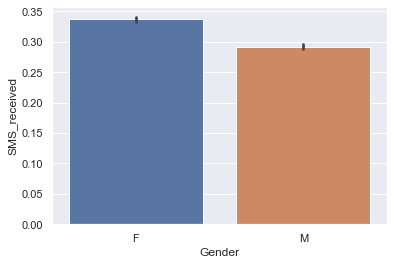

In [110]:
#target
sns.set_style('darkgrid')
sns.barplot(x='Gender',y='SMS_received', data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

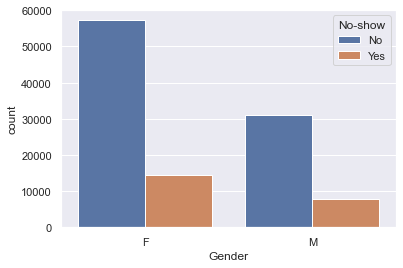

In [113]:
#target
sns.set_style('darkgrid')
sns.countplot(x="Gender", hue="No-show", data=df)

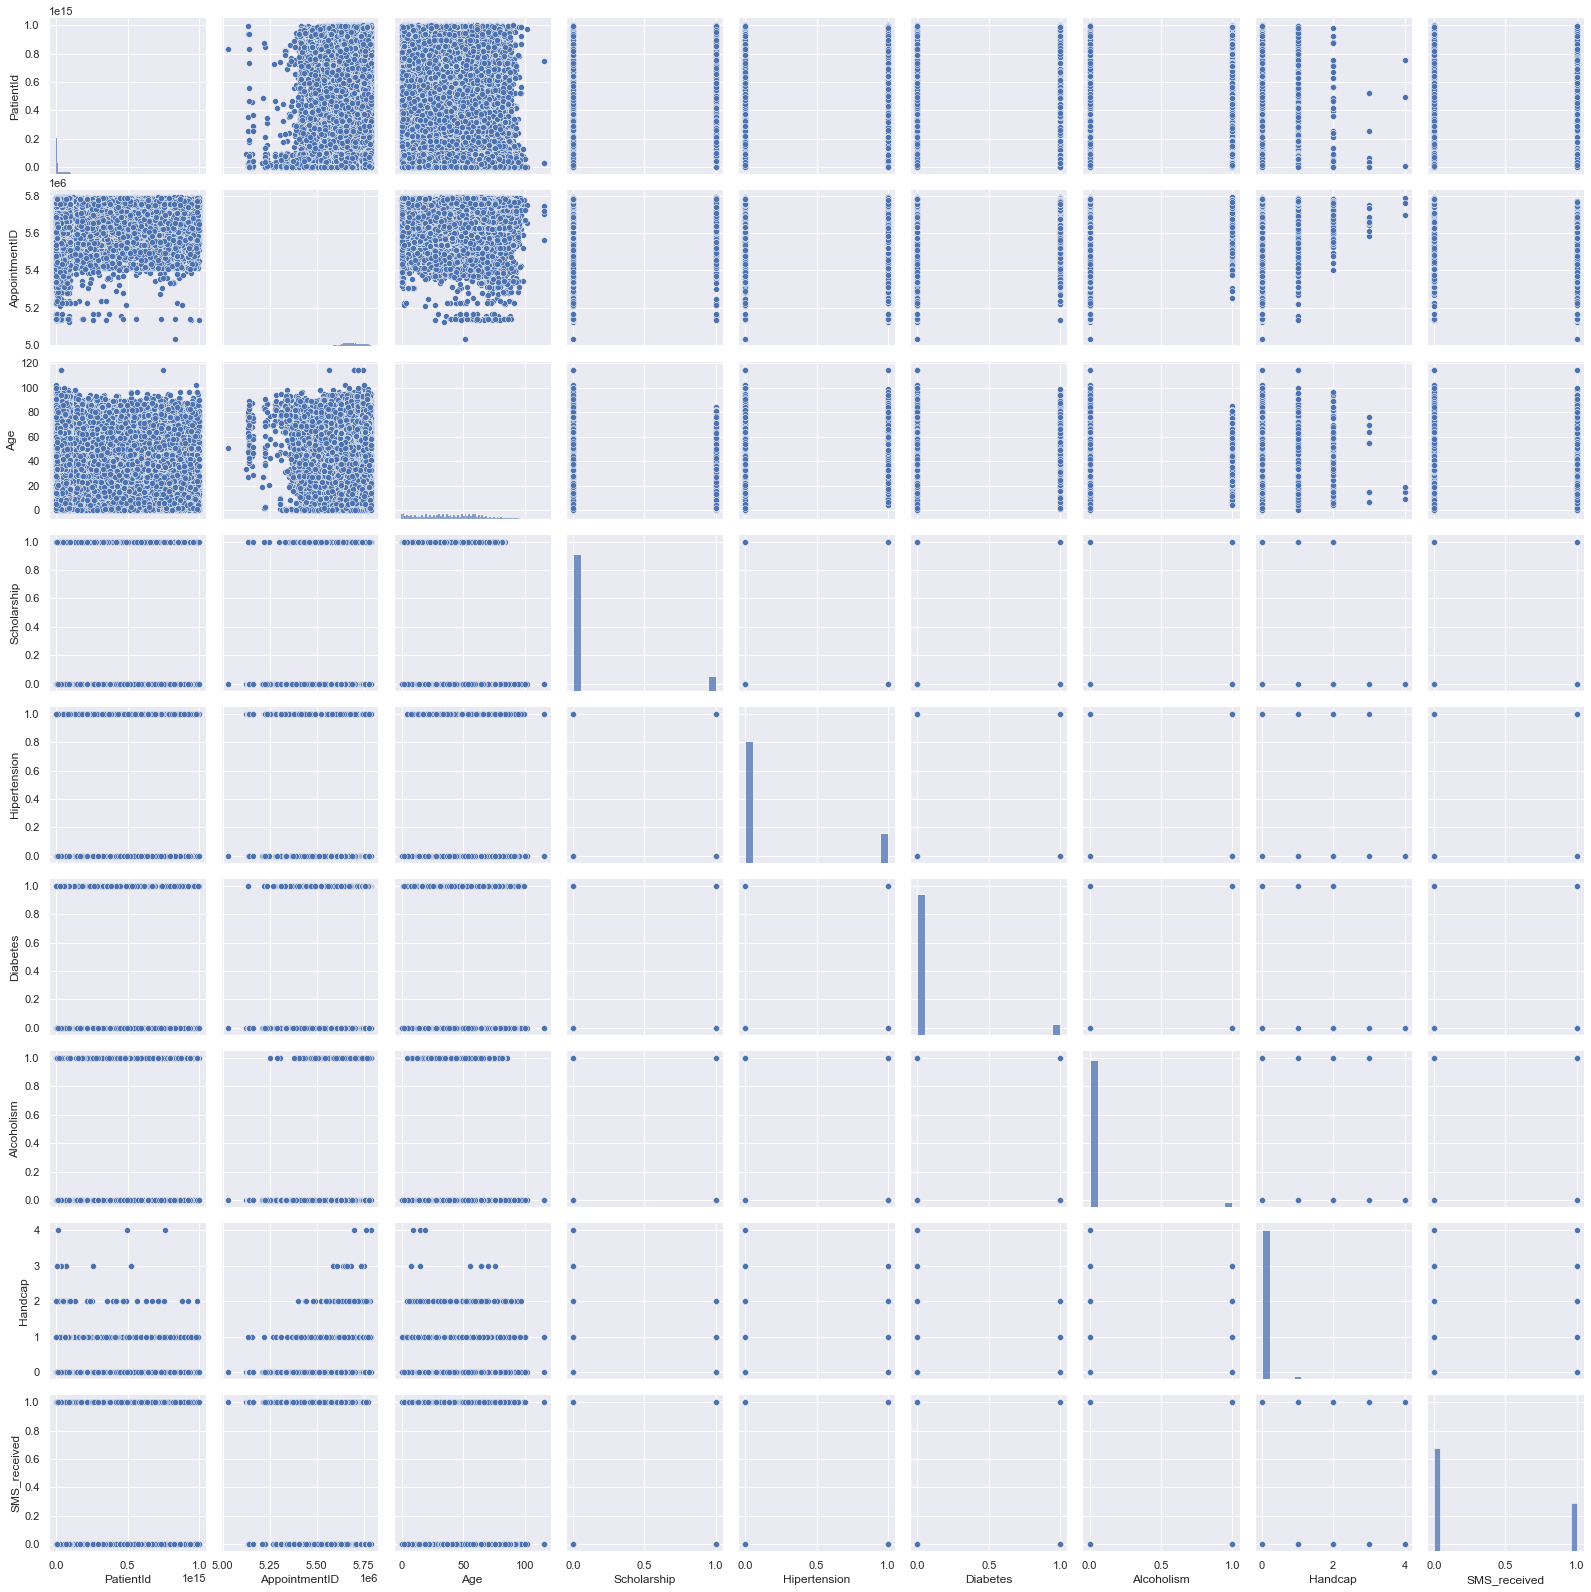

In [100]:
sns.pairplot(df); #not informative

<h3>3.1 Target variable</h3>

### 3.2. Numerical features


### 3.3 Categorical Features